In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Missing values per column:
recorddate                      0
Ammonia_mg.L-1                  1
BOD_mg.L-1                    420
COD_mg.L-1                     42
NitrateplusNitrite_mg.L-1    1244
Nitrogentotal_mg.L-1         1244
dtype: int64


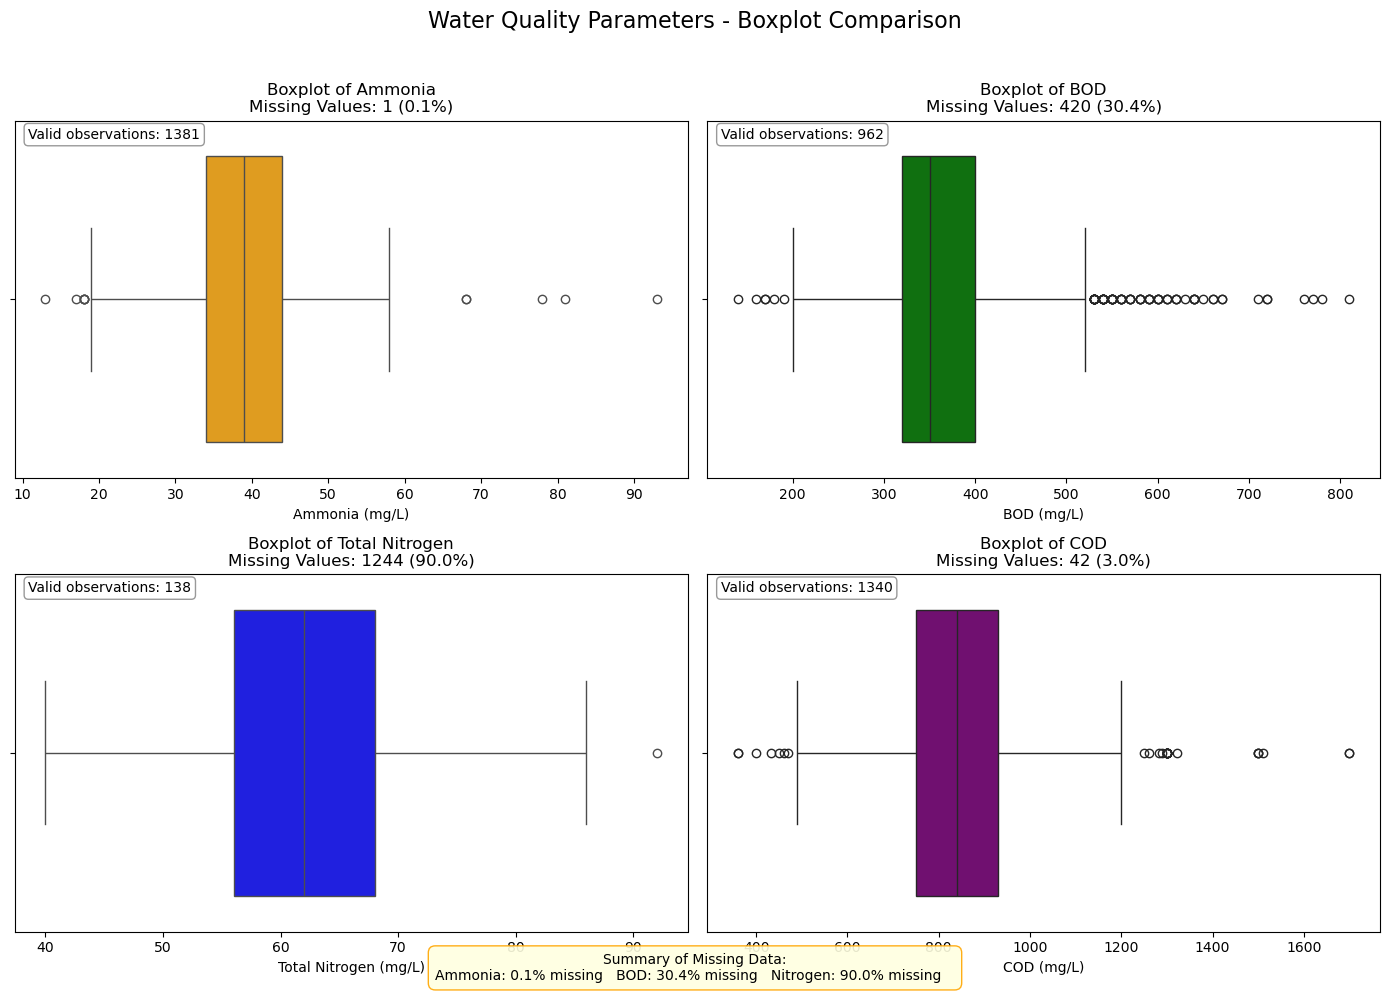

In [ ]:
# Read CSV
df = pd.read_csv('.\MWC_ETP_Daily_InfluentQuality_From2014_698890028305835467.csv')

# Count total missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Calculate percentage of missing values for our parameters of interest
total_rows = len(df)
missing_percentages = {
    'Ammonia': (df['Ammonia_mg.L-1'].isnull().sum() / total_rows) * 100,
    'BOD': (df['BOD_mg.L-1'].isnull().sum() / total_rows) * 100,
    'Nitrogen': (df['Nitrogentotal_mg.L-1'].isnull().sum() / total_rows) * 100
}

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten to make indexing easier

# Parameters to plot
params = [
    {'col': 'Ammonia_mg.L-1', 'title': 'Ammonia', 'color': 'orange', 'idx': 0},
    {'col': 'BOD_mg.L-1', 'title': 'BOD', 'color': 'green', 'idx': 1},
    {'col': 'Nitrogentotal_mg.L-1', 'title': 'Total Nitrogen', 'color': 'blue', 'idx': 2},
    {'col': 'COD_mg.L-1', 'title': 'COD', 'color': 'purple', 'idx': 3}
]

# Plot each parameter
for p in params:
    # Get data excluding NaN values
    data = df[p['col']].dropna()
    
    # Calculate number of missing values
    missing_count = df[p['col']].isnull().sum()
    missing_percent = (missing_count / total_rows) * 100
    
    # Create boxplot
    sns.boxplot(x=data, color=p['color'], ax=axes[p['idx']])
    
    # Add missing data information to title
    axes[p['idx']].set_title(f"Boxplot of {p['title']}\nMissing Values: {missing_count} ({missing_percent:.1f}%)")
    axes[p['idx']].set_xlabel(f"{p['title']} (mg/L)")
    
    # Add text about valid observations
    axes[p['idx']].annotate(f"Valid observations: {len(data)}", 
                           xy=(0.02, 0.95), xycoords='axes fraction',
                           bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add a main title to the figure
fig.suptitle("Water Quality Parameters - Boxplot Comparison", fontsize=16, y=0.98)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the suptitle

# Add text summary of missing data at the bottom of the figure
missing_text = "Summary of Missing Data:\n"
for param, pct in missing_percentages.items():
    missing_text += f"{param}: {pct:.1f}% missing   "

fig.text(0.5, 0.01, missing_text, ha='center', 
         bbox=dict(boxstyle="round,pad=0.5", fc="lightyellow", ec="orange", alpha=0.9))

# Save the figure
plot_path = os.path.join('../images/', "combined_boxplots_with_missing.png")
plt.savefig(plot_path)

# Show the plot
plt.show()

In [ ]:
#Load pollution analysis


In [6]:
def clean_date(x):
    """
    Try the obvious fixed formats first (fast), then fall back to the
    generic parser for anything stubborn.  Returns pd.NaT if all fail.
    """
    try:
        # US style with seconds & AM/PM
        return pd.to_datetime(x, format="%m/%d/%Y %I:%M:%S %p")
    except ValueError:
        pass
    try:
        # 24‑h clock, day‑first (common in AU/UK)
        return pd.to_datetime(x, format="%d/%m/%Y %H:%M")
    except ValueError:
        pass
    try:
        # Let dateutil figure out the rest (slower but flexible)
        return parser.parse(x, dayfirst=True)   # day‑first catches 8/03/2014 as 8 Mar
    except (ValueError, TypeError):
        return pd.NaT

df["recorddate"] = df["recorddate"].apply(clean_date)

# Optional: check what couldn’t be parsed
bad = df[df["recorddate"].isna()]
print("Unparsed rows:", len(bad))

# Finally, pick one canonical display format (ISO is safest):
df["recorddate"] = df["recorddate"].dt.strftime("%Y-%m-%d %H:%M:%S")
df = df.sort_values(by='recorddate')

display(df)


Unparsed rows: 0


,recorddate,Ammonia_mg.L-1,BOD_mg.L-1,COD_mg.L-1,NitrateplusNitrite_mg.L-1,Nitrogentotal_mg.L-1
1,2014-01-01 20:00:00,27.0,NaN,730.0,NaN,NaN
116,2014-01-04 20:00:00,41.0,NaN,945.0,NaN,NaN
201,2014-01-05 21:00:00,29.0,NaN,800.0,NaN,NaN
59,2014-01-06 21:00:00,31.0,NaN,710.0,NaN,NaN
81,2014-01-07 21:00:00,44.0,NaN,695.0,NaN,NaN
...,...,...,...,...,...,...
1355,2019-11-06 21:00:00,44.0,260.0,870.0,NaN,NaN
1230,2019-12-02 20:00:00,32.0,370.0,880.0,NaN,NaN
1256,2019-12-03 20:00:00,25.0,390.0,980.0,NaN,NaN
1311,2019-12-05 21:00:00,43.0,330.0,830.0,NaN,NaN


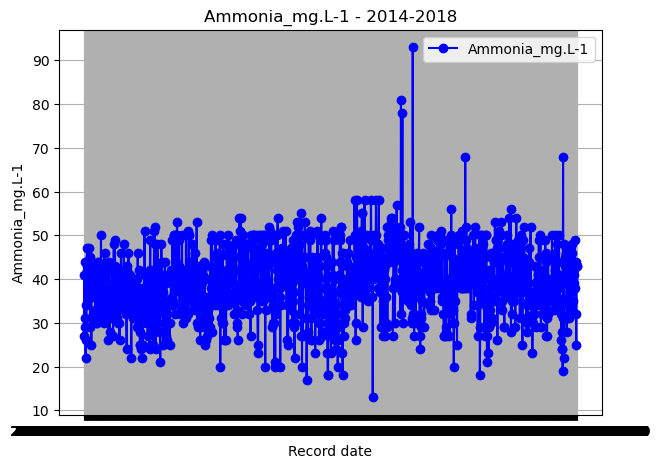

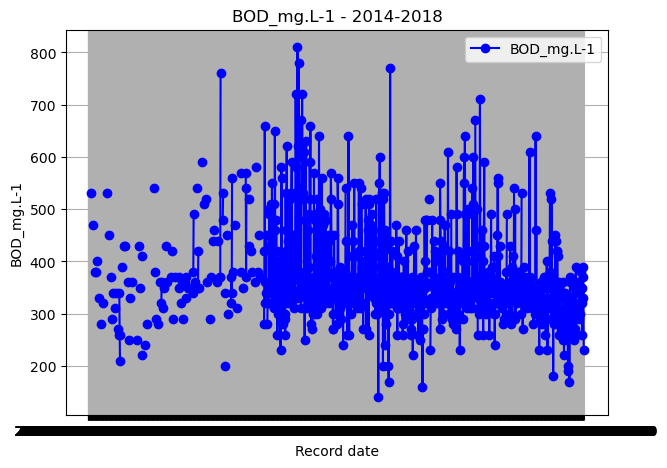

In [7]:
import matplotlib.dates as mdates


plt.figure(figsize=(7, 5))
plt.plot((df['recorddate']),(df['Ammonia_mg.L-1']), marker='o', linestyle='-',
         color='b', label="Ammonia_mg.L-1")
plt.xlabel("Record date")
plt.ylabel("Ammonia_mg.L-1")
plt.title("Ammonia_mg.L-1 - 2014-2018")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(7, 5))
plt.plot((df['recorddate']),(df['BOD_mg.L-1']), marker='o', linestyle='-',
         color='b', label="BOD_mg.L-1")
plt.xlabel("Record date")
plt.ylabel("BOD_mg.L-1")
plt.title("BOD_mg.L-1 - 2014-2018")
plt.legend()
plt.grid(True)
plt.show()

####Estimation of design flows and pollutant loads.

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Estimation of design flows and pollutant loads.

group_number=10
PE_domestic=340000 #Equivalent population.
Q_domesticpercapita=180 #L/PE/day taken from standards.
PE_commercial=math.ceil(group_number**0.5*9000) #Equivalent population.
Q_commercialpercapita=280 #L/PE/day given in the briefing.
Q_infiltration=11657 #m3/day

#Current average flow rates
Q_currentavgdomestic=Q_domesticpercapita*PE_domestic/1000
Q_currentavgcommercial=Q_commercialpercapita*PE_commercial/1000
Q_currentavginfiltration=Q_infiltration

#Current minimum flow rates
peak_minimum_factor=0.3 #Taken from the graph given in the briefing
Q_minimumdomestic=Q_currentavgdomestic*peak_minimum_factor
Q_minimumcomercial=Q_currentavgcommercial*peak_minimum_factor
Q_minimuminfiltration=Q_currentavginfiltration

#Current maximum flow rates
peak_maximum_factor=1.9 #Taken from the graph given in the briefing
Q_maximumdomestic=Q_currentavgdomestic*peak_maximum_factor
Q_maximumcomercial=Q_currentavgcommercial*peak_maximum_factor
Q_maximuminfiltration=Q_currentavginfiltration

#Equivalent population projection
growth_percentage=1+group_number*0.015
Life_time=20 #Life time decided to our WWTP. Provisional

PE_projected_domestic=math.ceil(PE_domestic*(1+growth_percentage/100)**Life_time)
PE_projected_comercial=math.ceil(PE_commercial*(1+growth_percentage/100)**Life_time)

climate_chage_factor=1.2 #Taken from a projection studies.

#Projected average flow rates (m3/day)
Q_projected_domestic=Q_domesticpercapita*PE_projected_domestic/1000
Q_projected_comercial=Q_commercialpercapita*PE_projected_comercial/1000
Q_projected_infiltration=Q_currentavginfiltration*climate_chage_factor

#Projected minimum flow rates (m3/day)

Q_projected_minimum_domestic=Q_projected_domestic*peak_minimum_factor
Q_projected_minimum_commercial=Q_projected_comercial*peak_minimum_factor
Q_projected_minimuminfiltration=Q_minimuminfiltration*climate_chage_factor

#Projected maximum flow rates (m3/day)
Q_projected_maximum_domestic=Q_projected_domestic*peak_maximum_factor
Q_projected_maximum_commercial=Q_projected_comercial*peak_maximum_factor
Q_projected_maximuminfiltration=Q_maximuminfiltration*climate_chage_factor

#Total Projected flow rates (m3/day)
Q_total_projected_maximum=Q_projected_maximum_domestic+Q_projected_maximum_commercial+Q_projected_maximuminfiltration
Q_total_projected_minimum=Q_projected_minimum_domestic+Q_projected_minimum_commercial+Q_projected_minimuminfiltration
Q_total_projected_average=Q_projected_domestic+Q_projected_comercial+Q_projected_infiltration

#Total current flow rates (m3/day)
Q_total_current_maximum=Q_maximumdomestic+Q_maximumcomercial+Q_maximuminfiltration
Q_total_current_minimum=Q_minimumdomestic+Q_minimumcomercial+Q_minimuminfiltration
Q_total_current_average=Q_currentavgdomestic+Q_currentavgcommercial+Q_currentavginfiltration

print (PE_projected_domestic)
print (PE_projected_comercial)

data_current = {
    'Contribution type': ['Domestic', 'Commercial', 'Infiltration', 'Total'],
    'Minimum flow rate (m3/day)': [Q_minimumdomestic, Q_minimumcomercial, Q_minimuminfiltration, Q_total_current_minimum],
    'Average flow rate (m3/day)': [Q_currentavgdomestic, Q_currentavgcommercial, Q_currentavginfiltration, Q_total_current_average],
    'Maximum flow rate (m3/day)': [Q_maximumdomestic, Q_maximumcomercial, Q_maximuminfiltration, Q_total_current_maximum],
}

df1 = pd.DataFrame(data_current)
display(df1)

data_projected = {
    'Contribution type': ['Domestic ', 'Commercial', 'Infiltration','Total'],
    'Minimum flow rate (m3/day)': [Q_projected_minimum_domestic, Q_projected_minimum_commercial, Q_projected_minimuminfiltration, Q_total_projected_minimum],
    'Average flow rate (m3/day)': [Q_projected_domestic,Q_projected_comercial, Q_projected_infiltration, Q_total_projected_average],
    'Maximum flow rate (m3/day)': [Q_projected_minimum_domestic, Q_projected_minimum_commercial, Q_projected_minimuminfiltration, Q_total_projected_maximum],
}
df2 = pd.DataFrame(data_projected)
display(df2)

427363
35775


,Contribution type,Minimum flow rate (m3/day),Average flow rate (m3/day),Maximum flow rate (m3/day)
0,Domestic,18360.000,61200.00,116280.000
1,Commercial,2390.724,7969.08,15141.252
2,Infiltration,11657.000,11657.00,11657.000
3,Total,32407.724,80826.08,143078.252


,Contribution type,Minimum flow rate (m3/day),Average flow rate (m3/day),Maximum flow rate (m3/day)
0,Domestic,23077.602,76925.34,23077.602
1,Commercial,3005.100,10017.00,3005.100
2,Infiltration,13988.400,13988.40,13988.400
3,Total,40071.102,100930.74,179178.846


####Check with practice - screen design

In [ ]:
#Preliminary treatment design:

#Velocity should be between 0.3 and 1 m/s
#Screen Width is recommended between 0.6 and 1.1 m

velocity_screen=0.7 #m/s, this value the first approximation.
cd=0.84 #dimensionless, this is a value of discharge coefficient for the screen
gravity=9.81 #m/s^2
width_between_bars=0.009 #m, given that it need to trap gross pollutans >10 mm
bar_with=0.004 #m, depends on commercial availability.


velocity_upstream_screen=velocity_screen*width_between_bars/(width_between_bars+bar_with) #m/s
print (velocity_upstream_screen)

head_loss_screen=1/(2*gravity*cd**2)*(velocity_screen**2-velocity_upstream_screen**2)
print (head_loss_screen)

#Design of the screen channel

flow_depth_downstream=0.4 #m during desing peak flow.

flow_depth_upstream=flow_depth_downstream+head_loss_screen

print (flow_depth_upstream)

wet_area=(22291/86400)/velocity_upstream_screen #Flow converted into m^3/s, area in m^2
print (wet_area)

width_channel_screen = (wet_area / flow_depth_upstream)

# Round up to the nearest multiple of 0.05
width_channel_screen_rounded = math.ceil(width_channel_screen / 0.1) * 0.1 #m

print (width_channel_screen_rounded)

if (width_channel_screen_rounded>1.1):
  screen_number=math.ceil(width_channel_screen_rounded/1.1)
  if not 0.3<screen_number<1.1:
    screen_number=math.ceil(screen_number)
  else:
    print('it is too narrow')

print (screen_number)

#It need to comply with the minimum velocity with the average current flow. In this case, we want to find the
#downstream height controlled by a hydraulic structure since this is not provided in the briefing.


velocity_upstream_screen_current_average=0.42 #m/s desired velocity

flow_depth_downstream_current_average=(12444/86400)/(velocity_upstream_screen_current_average*width_channel_screen_rounded)-head_loss_screen #m, it

print (flow_depth_downstream_current_average)

0.48461538461538456
0.018430387755252492
0.41843038775525254
0.5323761757789536
1.3
2
0.24535675103188628


####Design of screens - Preliminary treatment

5.4.3

In [25]:
#Preliminary treatment design:

#Velocity should be between 0.3 and 1 m/s
#Screen Width is recommended between 0.6 and 1.1 m

velocity_screen=1 #m/s, this value the first approximation.
cd=0.84 #dimensionless, this is a value of discharge coefficient for the screen
gravity=9.81 #m/s^2
width_between_bars=0.01 #m, given that it need to trap gross pollutans >10 mm
bar_with=0.004 #m, depends on commercial availability.


velocity_upstream_screen=velocity_screen*width_between_bars/(width_between_bars+bar_with) #m/s
print ('The velocity upstream the screen is: '+str(velocity_upstream_screen))

head_loss_screen=round(1/(2*gravity*cd**2)*(velocity_screen**2-velocity_upstream_screen**2),2)
print ('the head loss screen is: '+str(head_loss_screen))

#Design of the screen channel

flow_depth_downstream=1 #m during desing peak flow.

flow_depth_upstream=flow_depth_downstream+head_loss_screen

print ('the flow depth upstream is: '+str(flow_depth_upstream))

wet_area=(Q_total_projected_maximum/86400)/velocity_upstream_screen #Flow converted into m^3/s, area in m^2
print ('The weat area  is: '+str(wet_area))

width_channel_screen = (wet_area / flow_depth_upstream)

# Round up to the nearest multiple of 0.1
width_channel_screen_rounded = math.ceil(width_channel_screen / 0.1) * 0.1 #m

print ('The suitable width channel is: '+str(width_channel_screen_rounded)+' m')

if (width_channel_screen_rounded>1.1):
  screen_number=math.ceil(width_channel_screen_rounded/1.1)
  if not 0.3<screen_number<1.1:
    screen_number=math.ceil(screen_number)
  else:
    print('it is too narrow')

print ('The number of screen should be: '+str(screen_number))

#It need to comply with the minimum velocity with the minimum current flow. In this case, we want to find the
#downstream depth flow controlled by a hydraulic structure since this is not provided in the briefing.


velocity_upstream_screen_current_minimum=0.35 #m/s desired velocity

flow_depth_downstream_current_average=(Q_total_current_minimum/86400)/(velocity_upstream_screen_current_minimum*width_channel_screen_rounded)-head_loss_screen #m, it

print ('The depth flow controlled by a hydraulic structure should be less than '+str(flow_depth_downstream_current_average)+' m in order to comply with the minimum velocity with the average current flow.')





The velocity upstream the screen is: 0.7142857142857143
the head loss screen is: 0.04
the flow depth upstream is: 1.04
The weat area  is: 2.9014164861111107
The suitable width channel is: 2.8000000000000003 m
The number of screen should be: 3
The depth flow controlled by a hydraulic structure should be less than 0.34156325585789876 m in order to comply with the minimum velocity with the average current flow.


#### Equalization basin

9.7.6. Equalization Sustainability and Resource Recovery
Equalization operations have little resource recovery potential. However, they could provide significant sustainable features to a WRRF, as peak demand loadings and their associated larger energy requirements can be avoided when equalization is practiced.

Botero, Lucas, Joel C. Rife, Kendra D. Sveum, and Alex Szerwinski. 2018. “Equalization.” Chap. 9.7 in Design of Water Resource Recovery Facilities. 6th ed., edited by The Water Environment Federation (WEF). McGraw-Hill Education: New York, Chicago, San Francisco, Athens, London, Madrid, Mexico City, Milan, New Delhi, Singapore, Sydney, Toronto. https://www.accessengineeringlibrary.com/content/book/9781260031188/toc-chapter/chapter9/section/section101

,Time of Day,Qavg (m³/hr),Flow distribution Q (m³/hr),Difference (Flow-Qavg) (m³/hr),Amount to Storage (m³),Amount from Storage (m³),Running Total in Storage (m³)
0,0 to 1,4200.447500,2520.268500,-1680.179000,0.000000,1680.179000,0.000000
1,1 to 2,4200.447500,2100.223750,-2100.223750,0.000000,2100.223750,0.000000
2,2 to 3,4200.447500,1680.179000,-2520.268500,0.000000,2520.268500,0.000000
3,3 to 4,4200.447500,1260.134250,-2940.313250,0.000000,2940.313250,0.000000
4,4 to 5,4200.447500,1260.134250,-2940.313250,0.000000,2940.313250,0.000000
5,5 to 6,4200.447500,1680.179000,-2520.268500,0.000000,2520.268500,0.000000
6,6 to 7,4200.447500,2520.268500,-1680.179000,0.000000,1680.179000,0.000000
7,7 to 8,4200.447500,2940.313250,-1260.134250,0.000000,1260.134250,0.000000
8,8 to 9,4200.447500,3360.358000,-840.089500,0.000000,840.089500,0.000000
9,9 to 10,4200.447500,3780.402750,-420.044750,0.000000,420.044750,0.000000


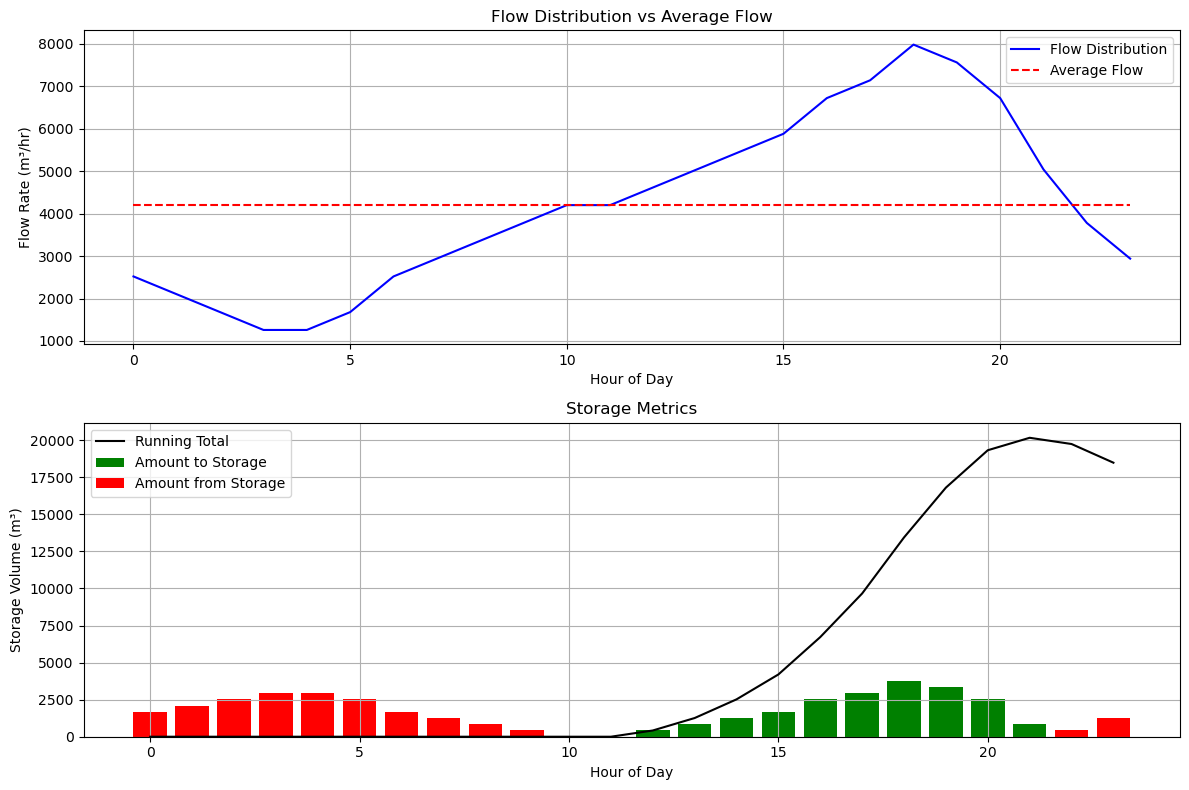

24000.0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Create data for the table
data = {
    'Time of Day': [f"{i} to {i+1}" for i in range(0, 24)],
    'Qavg (m³/hr)': [Q_total_projected_average/24] * 24,  # Constant average flow
}

# Flow distribution that follows a pattern (low at night, high during day)
# This values are taken from Daily fluctuation of peaking factors graph given in the briefing.
flow_coefficients = [
    0.6, 0.5, 0.4, 0.3, 0.3, 0.4, 0.6, 0.7,
    0.8, 0.9, 1, 1, 1.1, 1.2, 1.3, 1.4,
    1.6, 1.7, 1.9, 1.8, 1.6, 1.2, 0.9, 0.7
]
# Calculate actual flow values by multiplying coefficients by the average
flow_values = [coef * Q_total_projected_average/24 for coef in flow_coefficients]
data['Flow distribution Q (m³/hr)'] = flow_values[:24]

# Calculate the difference
data['Difference (Flow-Qavg) (m³/hr)'] = [q - data['Qavg (m³/hr)'][0] for q in data['Flow distribution Q (m³/hr)']]

# Initialize storage calculations
data['Amount to Storage (m³)'] = [0] * 24
data['Amount from Storage (m³)'] = [0] * 24
data['Running Total in Storage (m³)'] = [0] * 24

# Calculate storage values
running_total = 0
for i in range(24):
    diff = data['Difference (Flow-Qavg) (m³/hr)'][i]

    # If flow > avg, we add to storage
    if diff > 0:
        data['Amount to Storage (m³)'][i] = diff
        data['Amount from Storage (m³)'][i] = 0
        running_total += diff
    # If flow < avg, we take from storage
    else:
      if running_total == 0:
        data['Amount to Storage (m³)'][i] = 0
        data['Amount from Storage (m³)'][i] = abs(diff)
        running_total += 0
      else:
        data['Amount to Storage (m³)'][i] = 0
        data['Amount from Storage (m³)'][i] = abs(diff)
        running_total -= abs(diff)

    data['Running Total in Storage (m³)'][i] = running_total

# Create DataFrame
df = pd.DataFrame(data)

# Format the DataFrame for better display
# Format time of day column
df['Time of Day'] = [f"{i:2d} to {i+1:2d}" for i in range(0, 24)]

# Apply formatting to numeric columns to match the table
pd.options.display.float_format = '{:.0f}'.format

# Create styled table
styled_df = df.style.set_table_styles([
    {'selector': 'th', 'props': [('color', 'black'),
                               ('font-weight', 'bold'),
                               ('border', '1px solid #ddd'),
                               ('padding', '5px')]},
    {'selector': 'td', 'props': [('border', '1px solid #ddd'),
                               ('padding', '5px')]},
    {'selector': '', 'props': [('border-collapse', 'collapse'),
                             ('width', '100%'),
                             ('font-size', '14px')]}
])

# Group headers
header_style = {
    'selector': 'th.col_heading',
    'props': [('background-color', '#0a6e3c'),
              ('color', 'white'),
              ('text-align', 'center'),
              ('font-weight', 'bold'),
              ('border', '1px solid black'),
              ('padding', '5px')]
}

# Display the styled table
display(styled_df)

# If you want to save to Excel
df.to_excel("water_flow_table.xlsx", index=False)

# Create a visualization of the data
plt.figure(figsize=(12, 8))

# Plot flow distribution vs average flow
plt.subplot(2, 1, 1)
plt.plot(range(24), df['Flow distribution Q (m³/hr)'], 'b-', label='Flow Distribution')
plt.plot(range(24), df['Qavg (m³/hr)'], 'r--', label='Average Flow')
plt.xlabel('Hour of Day')
plt.ylabel('Flow Rate (m³/hr)')
plt.title('Flow Distribution vs Average Flow')
plt.grid(True)
plt.legend()

# Plot storage metrics
plt.subplot(2, 1, 2)
plt.bar(range(24), df['Amount to Storage (m³)'], color='green', label='Amount to Storage')
plt.bar(range(24), df['Amount from Storage (m³)'], color='red', label='Amount from Storage')
plt.plot(range(24), df['Running Total in Storage (m³)'], 'k-', label='Running Total')
plt.xlabel('Hour of Day')
plt.ylabel('Storage Volume (m³)')
plt.title('Storage Metrics')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#Include adquate safety factors

safety_factor=1.2 #We meed to justify this.
required_volume_equalizer=safety_factor*max(df['Running Total in Storage (m³)'])
rounded_required_volume_equalizer=round(required_volume_equalizer,-3) #m3
print (rounded_required_volume_equalizer)


### Primary Clarifier ###

### Table 1. Useful equations.

| Equation                                                                                                                                  | Description                                                                                                                                                              |
| :---------------------------------------------------------------------------------------------------------------------------------------- | :----------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| $$SLR = \frac{Q}{A}$$                                                                                                                     | **SLR**: Surface Loading Rate<br>**Q**: inflow<br>**A**: surface area                                                                                                    |
| $$t = \frac{Volume}{Q} = \frac{H}{SLR}$$                                                                                                   | **t**: detention time<br>**Volume**: Volume<br>**Q**: inflow<br>**H**: water depth in the tank<br>**SLR**: Surface Loading Rate                                               |
| $$Q_{perV-notch} = \frac{8}{15} C_d \sqrt{2g} \tan{\frac{\theta}{2}} h^{\frac{5}{2}}$$                                                       | **$Q_{perV-notch}$**: flow over v-notch<br>**$C_d$**: discharge coefficient<br>**g**: acceleration due to gravity<br>**$\theta$**: angle of the v-notch<br>**h**: maximum height of water over weirs |
| $$Q_{perV-notch} = \frac{Q}{N}$$                                                                                                           | **$Q_{perV-notch}$**: flow over v-notch<br>**Q**: inflow<br>**N**: number of v-notches                                                                                     |
| $$v_h = \frac{Q}{WH} = \frac{L}{t}$$                                                                                                       | **$v_h$**: horizontal velocity<br>**Q**: inflow<br>**W**: tank width<br>**H**: tank depth<br>**t**: detention time<br>**L**: tank length                                    |
| $$v_H = \sqrt{\frac{8k(s-1)gd}{f}}$$                                                                                                       | **$v_H$**: scour velocity<br>**k**: scoured material constant<br>**s**: spec. gravity of particles<br>**g**: acceleration due to gravity<br>**d**: particle diameters<br>**f**: Darcy-Weisbach friction factor |
| $$y_c = \left[ \frac{(qL)^2}{4b^2g} \right]^{\frac{1}{3}}$$                                                                                 | **$y_c$**: critical depth<br>**q**: discharge per unit launder length<br>**L**: the length of the launder<br>**b**: the width of the launder<br>**g**: acceleration due to gravity |
| $$H = \left( y_c^2 + \frac{2q^2x^2}{gb^2y_c} \right)^{\frac{1}{2}}$$                                                                       | **H**: total head<br>**$y_c$**: critical depth<br>**q**: discharge per unit launder length<br>**x**: distance (L/2 for a circular basin)<br>**g**: acceleration due to gravity<br>**b**: the width of the launder |
| $$R = \frac{t}{a + bt}$$                                                                                                                   | **R**: efficiency in %<br>**t**: residence time in hours<br>**a**: parameter<br>**b**: parameter                                                                          |

---
**Standard Parameters**

| Constituent | a      | b      |
| :---------- | :----- | :----- |
| BOD₅        | 0.018  | 0.020  |
| SS          | 0.0075 | 0.014  |

**Design Guidelines**

| Parameter | Value | 
|-----------|-------| 
| Detention time, t <br> <div style="margin-left: 20px;"> For average dry weather flow </div> | 1.5 and 2.5 hours | 
| Surface loading rate, SLR <br><div style="margin-left: 20px;">For average dry weather flow <br> For peak flow conditions</div> | <br> 32 - 49 $m^3/m^2/day$ <br> 49 - 122 $m^3/m^2/day$ | 
| Clarifier diameter | 10 – 60 m | 
| Sidewater depth, H | 2.1 – 5 m | 
| Weir loading rate, WLR | 125 – 500 $m^3/m/day$ | 
| 90° V-notch weirs <br><div style="margin-left: 20px;"> Height safety factor <br> $C_d$ </div> | <br> 15% additional <br> 0.58 | 
| Launder depth safety factor | 50% additional depth | 

In [72]:
# 0. Given parameters:

Q_ADW = 2.9    # Projected Average Dry Weather flow rate (m³/hr)
Q_PHR = 5.9    # (Peak) Maximum hourly flow rate (m³/hr)

# 1. Determine the time of residence according to the efficiency of the suspended solids (SS) removal
# and determine the time of residence according to the efficiency of the BOD removal.

'''From table "Standard parameter" the time of residence for the SS removal and BOD removal is as follows:'''

a_SS = 0.0075 
b_SS = 0.014
a_BOD = 0.018
b_BOD = 0.020

R_SS = 55  # Minimum Removal efficiency for SS
R_BOD = 30  # Minimum Removal efficiency for BOD

t_SS = R_SS*a_SS/(1-R_SS*b_SS)  # Time of residence for SS removal (hours)
t_BOD = R_BOD*a_BOD/(1-R_BOD*b_BOD)  # Time of residence for BOD removal (hours)

print(f"Time of residence for SS removal: {t_SS:.2f} hours")
print(f"Time of residence for BOD removal: {t_BOD:.2f} hours")

# The time of residence for the SS is equal to 1.79 hours and for the BOD is equal to 1.35 hours, both for Peak Hourly Flow.

# 2. The total volume of the clarifier tanks is determined by the greater of the two detention times calculated for the SS and BOD removal.
# The volume of the clarifier tanks is calculated using the Equation 1:

conv_h_to_s = 3600  # Conversion factor from hours to seconds
V_total = Q_PHR * t_SS * conv_h_to_s # Total volume given by the greater time of residence (t_SS) (m³)
print(f"Total volume of clarifier tanks (using SS removal time): {V_total:.2f} m³")

# 3. It's checked that the detention time for is not less than 1.5 hours or greater than 2.5 hours (see guidelines Table P.C.2) for average dry flow rate condition.

# It's obvious that the detention time is not less than 1.5 hours due to the fact that the volume of the clarifier tanks is calculated using the peak hourly flow rate (Q_PHR),
# and the average dry weather flow rate (Q_AWD) is lower than Q_PHF. Hence, the detention time by average dry weather flow rate is determined as follows:
t_AWD = V_total / (Q_ADW * conv_h_to_s)  # Detention time for average dry weather flow rate (hours)
print(f"Detention time for average dry weather flow rate: {t_AWD:.2f} hours")

# The detention time for average dry weather flow rate is equal to 4.41 hours, which is greater than 2.5 hours. Thus, using the maximum detention time for AWD allowed by the guidelines,
# the volume of the clarifier tanks is recalculated using the maximum detention time of 2.5 hours:
t_AWD_max = 2.5  # Maximum detention time for average dry weather flow rate (hours)
V_AWD_max = Q_ADW * t_AWD_max * conv_h_to_s  # Volume of clarifier tanks using maximum detention time for AWD (m³)
print(f"Volume of clarifier tanks (using maximum detention time for AWD): {V_AWD_max:.2f} m³")

# 4. The excess volume of the clarifier tanks is calculated as follows:

V_excess = V_total - V_AWD_max  # Excess volume of clarifier tanks (m³)
# This volume will be determined as the volume for the equalization tank, which is used to balance the flow rate and the volume of the clarifier tanks.
print(f"Excess volume of clarifier tanks (equalization tank volume): {V_excess:.2f} m³")

# 5. Having the new volume of the clarifier tanks, a new peak hourly flow rate is calculated using the new volume of the clarifier tanks and the maximum detention time for
# peak hourly flow condition meeting the minimum removal efficiency for SS and BOD removal.

# The new peak hourly flow rate is calculated as follows:
Q_PHR_new = V_AWD_max / (t_SS * conv_h_to_s)  # New peak hourly flow rate (m³/hr)
print(f"New peak hourly flow rate: {Q_PHR_new:.2f} m³/s")

# 6. According to the guidelines, the volume of one clarifier tank is calculated as follows:
# From Table P.C.2 the maximum diameter of the clarifier tank is 60 m and the maximum sidewater depth is 5 m.}
# The volume of one clarifier tank is calculated as follows:

import numpy as np

D_max = 60  # Maximum diameter of the clarifier tank (m)
H_max = 5  # Maximum sidewater depth (m)
V_clarifier = (np.pi * D_max**2 * H_max) / 4  # Volume of one clarifier tank (m³)
print(f"Volume of one clarifier tank: {V_clarifier:.2f} m³")

# 7. The number of clarifier tanks is calculated as follows:
N_clarifier = np.ceil(V_AWD_max / V_clarifier)  # Number of clarifier tanks, is rounded up to the nearest integer
# The number of clarifier tanks is rounded up to the nearest integer because we cannot have a fraction of a tank.
print(f"Number of clarifier tanks: {N_clarifier:.0f}")

# 8. The diameter of "one" clarifier tank is calculated as follows:
D_clarifier = (4 * (V_AWD_max/N_clarifier) / (np.pi * H_max))**0.5  # Diameter of the clarifier tank (m)
print(f"Diameter of the clarifier tank: {D_clarifier:.2f} m")
# The diamater of one clarifier tank meets the design guidelines requirementshecked that the tot



Time of residence for SS removal: 1.79 hours
Time of residence for BOD removal: 1.35 hours
Total volume of clarifier tanks (using SS removal time): 38093.48 m³
Detention time for average dry weather flow rate: 3.65 hours
Volume of clarifier tanks (using maximum detention time for AWD): 26100.00 m³
Excess volume of clarifier tanks (equalization tank volume): 11993.48 m³
New peak hourly flow rate: 4.04 m³/s
Volume of one clarifier tank: 14137.17 m³
Number of clarifier tanks: 2
Diameter of the clarifier tank: 57.65 m


### Secondary Treatment

In [ ]:
BOD_primary_clarifier=180 #mg/L
BOD_required_to_effluent=20 #mg/L
Q1=80000 #m3/d, This needs to be our average flow.
Q2=174000 #m3/d, This needs to be our peak flow.
return_sludge_suspended_solids=8000 #mg/L(XR)
mixed_liquor_suspended_solids=3200 #mg/L(X)
yield_coefficient=0.6 #SS/mg BOD5 (Y)
decay_coefficient=0.06 #/day (Kd)
conversion_rate_constant=0.2 #/day (k)

BOD_removal_efficiency=(BOD_primary_clarifier-BOD_required_to_effluent)/(BOD_primary_clarifier)*100
print (BOD_removal_efficiency)

suspended_volumen_index=10**6/return_sludge_suspended_solids #mL/g ((SVI)
print (suspended_volumen_index)

volumen_settled_sludge=suspended_volumen_index*mixed_liquor_suspended_solids/1000 #v
print (volumen_settled_sludge)

return_sluge_flow=(Q1*volumen_settled_sludge)/(1000-volumen_settled_sludge) #m3/d
print (return_sluge_flow)

return_sludge_ratio=return_sluge_flow/Q1*100
print (return_sludge_ratio)

food_to_microorganism_ratio=0.405 #This value depends on the process, for this case it is a extended aereation. Try to minimize the volumen.

aereation_volumen=(BOD_primary_clarifier*Q1)/(food_to_microorganism_ratio*mixed_liquor_suspended_solids)
print ('aereation volumen is: ' +str(aereation_volumen))

aereation_time=(aereation_volumen/Q1)*24 #hours.
print ('aereation time is: ' +str(aereation_time))

BOD_load=(BOD_primary_clarifier*Q1)/aereation_volumen #g/m3/day
print ('BOD load is: ' +str(BOD_load))

specific_utilisation_ratio=(food_to_microorganism_ratio*BOD_removal_efficiency)/100 #dimensionless
print ('specific utilisation ratio is: ' +str(specific_utilisation_ratio))

sludge_age=1/(yield_coefficient*specific_utilisation_ratio-decay_coefficient) #days IT SHOULD BE CHECKED WITH A IF STATMENT.
print('sludge age is: ' +str(sludge_age))

safety_factor_peak_org_loading=1.3 #This try to account the variation of BOD regardless the flow.

sludge_age_increased=sludge_age*safety_factor_peak_org_loading
print('sludge age increased is: ' +str(sludge_age_increased))

#aereation time contact 0.5

#aereation time stabilization 2 therefore the ratio is 4

contact_tank_volumen=aereation_volumen/5
stabilization_tank_volumen=aereation_volumen-(aereation_volumen/5)

print('contact tank is: ' +str(contact_tank_volumen))
print('stabilization volumen tank is: ' +str(stabilization_tank_volumen))

contact_tank_depth=5 #m, it should between 3-6.
print('contact tank deth is: ' +str(contact_tank_depth))
contact_tank_length=4*contact_tank_depth #m,
print('contact tank length is: ' +str(contact_tank_length))
contact_tank_width=contact_tank_volumen/(contact_tank_depth*contact_tank_length) #m, it should be less than 4m.
print('contact tank width: ' +str(contact_tank_width))


stabilization_tank_length=65 #m, it needs to be between 4-90 m
print('Stabilization tank length is: ' +str(stabilization_tank_length))
stabilization_tank_width=24 #m, it needs to be in the maximum range
print('Stabilization tank width: ' +str(stabilization_tank_width))
stabilization_tank_depth=stabilization_tank_volumen/(stabilization_tank_width*stabilization_tank_length) #m, it should between 3-6.
print('Stabilization tank depth: ' +str(stabilization_tank_depth))


88.88888888888889
125.0
400.0
53333.333333333336
66.66666666666667
aereation volumen is: 11111.111111111111
aereation time is: 3.3333333333333335
BOD load is: 1296.0
specific utilisation ratio is: 0.36
sludge age is: 6.410256410256411
sludge age increased is: 8.333333333333334
contact tank is: 2222.222222222222
stabilization volumen tank is: 8888.888888888889
contact tank deth is: 5
contact tank length is: 20
contact tank width: 22.22222222222222
Stabilization tank length is: 65
Stabilization tank width: 24
Stabilization tank depth: 5.698005698005698


Secondary treatment - Check with practice

Environmental Impact Assessment:

In [38]:
#Initial information Environmental impact assessment.

#Flow receiving waterway according to the group number given in the briefing.
flow_receiving_waterway=round((group_number**0.2*300000),3) #m3/day, this is a value taken from the briefing.
print('Flow receiving waterway: ' +str(flow_receiving_waterway)+ ' m3/day')

#BOD5 receiving waterway directly uptream from discharge point (Lr).
bod_upstream_receiving_waterway= 4 #mg/L, this is a value taken from the briefing.

saturation_dissolved_oxygen=8.5 #mg/L, this is a value taken from the briefing.

#Initial disolve oxygen deficit in the receiving waterway (D0).
initial_disolved_oxygen_deficit=0.8 #mg/L, this is a value taken from the briefing.

#Reareation rate constant base e (kr).
reaeration_rate_constant=0.71 #1/day, this is a value taken from the briefing.

#desoxygenation rate constant base e (kd).
desoxygenation_rate_constant=0.51 #1/day, this is a value taken from the briefing.

#stream velocity 
stream_velocity=0.07 #m/s, this is a value taken from the briefing.

#disolved oxygen needs to be greater than 70% of saturation. According to ENVIRONMENT REFERENCE STANDARD for Victoria.
#This is for a surface waterway located in the north west of Melbourne.
minimum_dissolved_oxygen=round(0.7*saturation_dissolved_oxygen,2) #mg/L.

print('Minimum dissolved oxygen: ' +str(minimum_dissolved_oxygen)+' mg/L')

maximum_dissolved_oxygend_deficit=saturation_dissolved_oxygen-minimum_dissolved_oxygen #mg/L,
print('Maximum dissolved oxygen deficit: ' +str(maximum_dissolved_oxygend_deficit)+' mg/L')

max_bod_5_effluent=20 #mg/L, this is a value taken from EPA guidelines (Lw).

first_reaction_order_constant=0.23 #1/day, this is a value taken book reference Mcalf eddy pag 118-119.

bod_ultimate_effluent=round((max_bod_5_effluent/(1-math.exp(-first_reaction_order_constant*5))),2) #mg/L, this is a value taken from the briefing.
print('BOD ultimate effluent: ' +str(bod_ultimate_effluent)+' mg/L')

#This is the equation for the BOD ultimate mixing zone (Lo)
bod_ultimate_mixing_zone=round((flow_receiving_waterway*bod_upstream_receiving_waterway+Q_total_projected_average*bod_ultimate_effluent)/(flow_receiving_waterway+Q_total_projected_maximum),2) #mg/L. Q TOTAL PROJECTED AVERAGE needs to be checked due to new peak flow.
print('BOD ultimate mixing zone: ' +str(bod_ultimate_mixing_zone)+' mg/L')

#time at which DO will reach minimum level (tc).

time_minimum_dissolved_oxygen=1/(reaeration_rate_constant-desoxygenation_rate_constant)*math.log(reaeration_rate_constant/desoxygenation_rate_constant*(1-initial_disolved_oxygen_deficit*((reaeration_rate_constant-desoxygenation_rate_constant)/(desoxygenation_rate_constant*bod_ultimate_mixing_zone)))) #days.

print('Time at which DO will reach minimum level: ' +str(time_minimum_dissolved_oxygen)+' days')

#In order to calculate the length of the minimium DO level, we use (tc) and the stream velocity (v).

lenght_minimum_DO_level=round(time_minimum_dissolved_oxygen*86400*stream_velocity,2) #m, this is a value taken from the briefing.
print('Length of the minimum DO level: ' +str(lenght_minimum_DO_level)+' m')

#Dissolve oxigen  at the time of minimum level (DOt).
dissolved_oxygen_deficit_at_time_minimum_level=((desoxygenation_rate_constant*bod_ultimate_mixing_zone)/(reaeration_rate_constant-desoxygenation_rate_constant))*(math.exp(-desoxygenation_rate_constant*time_minimum_dissolved_oxygen)-math.exp(-reaeration_rate_constant*time_minimum_dissolved_oxygen))+(initial_disolved_oxygen_deficit*math.exp(-reaeration_rate_constant*time_minimum_dissolved_oxygen))#mg/L.
print('Dissolved oxygen deficit at the time of minimum level: ' +str(dissolved_oxygen_deficit_at_time_minimum_level)+' mg/L')

if dissolved_oxygen_deficit_at_time_minimum_level>maximum_dissolved_oxygend_deficit:
  print('The dissolved oxygen deficit at the time of minimum level is greater than the maximum dissolved oxygen deficit.')
else:
    print('The dissolved oxygen deficit at the time of minimum level is less than the maximum dissolved oxygen deficit.')



Flow receiving waterway: 475467.958 m3/day
Minimum dissolved oxygen: 5.95 mg/L
Maximum dissolved oxygen deficit: 2.55 mg/L
BOD ultimate effluent: 29.27 mg/L
BOD ultimate mixing zone: 7.42 mg/L
Time at which DO will reach minimum level: 1.4382665734869329 days
Length of the minimum DO level: 8698.64 m
Dissolved oxygen deficit at the time of minimum level: 2.559492151224564 mg/L
The dissolved oxygen deficit at the time of minimum level is greater than the maximum dissolved oxygen deficit.
